# Bayes Rule

<big>  
* Wikipedia: https://en.wikipedia.org/wiki/Bayes%27_theorem   
* Maybe useful paper: http://web.mit.edu/cocosci/Papers/tenenbaum_griffiths01.pdf    
* Maybe useful reference:     
    https://www.cs.ubc.ca/~murphyk/Teaching/CS340-Fall07/josh1.pdf    
    https://www.cs.ubc.ca/~murphyk/Teaching/CS340-Fall07/josh2.pdf   


### Fair Coin Experiment  

There is no cool code in this notebook...

* $H_1$:{the coin is fair} and $p(H_1) = 1/3$  
* $H_2$:{the coin has two heads} and $p(H_2) = 1/3$    
* ##$H_3$:{the coin has two tails} and $p(H_3) = 1/3$  
    


In [179]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='ticks', palette='Set2')

In [180]:
#how many heads in a row can make you believe this coin is unfair
flip_coin = np.random.binomial(n=1, p=1., size=20)

In [181]:
#some helping function
def multiply(array):
    n = len(array)
    pro = 1
    for i in range(n): 
        pro = pro * array[i] 
    return pro 


In [182]:
x_axis = np.arange(1,22,1)

    
1. Calculate the likelihood $(P(Data|H)$, that is the probability of having such data given one hypothesis)

In [200]:
#likelihood
p_1 = []
p_2 = []
#p_3 = []
likeli_1 = []
likeli_2 = []
#likeli_3 = []
for data in flip_coin:
    p_1.append(st.bernoulli.pmf(data, 0.5))
    likeli_1.append(multiply(p_1))
    p_2.append(st.bernoulli.pmf(data, 1))
    likeli_2.append(multiply(p_2))
    #p_3.append(st.bernoulli.pmf(data, 0))
    #likeli_3.append(multiply(p_3))

2. The prior probability P(the coin has the probability p of getting a head)

In [185]:
#prior_1, prior_2, prior_3 = 1/3, 1/3, 1/3

3. Posterior probability $P(p|Data)$, that is, the probability of seeing a head for the particular coin given a set of data.

In [202]:
post_1 = [1/2]
post_2 = [1/2]
#post_3 = [1/3]

for i in range(20):
    post_1.append(likeli_1[i] * prior_1 / (likeli_1[i] * prior_1 + likeli_2[i]* prior_2))
                                      #+ p_3[i]*prior_3))
    post_2.append(likeli_2[i] * prior_2 / (likeli_1[i] * prior_1 + likeli_2[i]* prior_2))
                                      #+ p_3[i]*prior_3))
    #post_3.append(p_3[i] * prior_3 / (p_1[i] * prior_1 + p_2[i]* prior_2+ p_3[i]*prior_3))

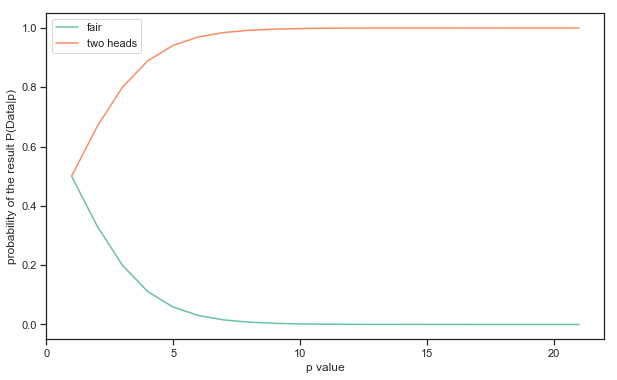

In [203]:
plt.figure(figsize = (10,6))
plt.plot(x_axis, post_1, label = 'fair')
plt.plot(x_axis, post_2, label = 'two heads')
#plt.plot(x_axis, post_3, label = 'two tails')

plt.xlabel('p value') 
plt.ylabel('probability of the result P(Data|p)')
plt.xticks(np.arange(0,21,5))
plt.legend(loc = 'best')

### Number Game

In [ ]:
def likelihood(x, h):
    '''
    x: a data point or a list of data points
    h: a hypothesis, the data type could be anything(int, string...)

    '''
    if h == 1 or h == 2: #even number or odd number
        prob = (1/50)**(len(x))
    elif h == 3: #square number (1,4,9,16,25,36,49,64,81,100) 
        prob = (1/10)**(len(x))
    else:
        prob = 0 #for data points not in it...
        
    return prob

In [ ]:
def posterior(x,p(x|H)):
    '''
    x: a data point or a list of data points
    p(x|H): a list of probabilities containing p(x|H1), p(x|H2)...

    '''
    p(h|x)[0] = (p(x|H)[0]*1/6) / (sum(p(x|H)*1/6))
    p(h|x)[1] = (p(x|H)[1]*1/6) / (sum(p(x|H)*1/6))
    p(h|x)[2] = (p(x|H)[2]*1/6) / (sum(p(x|H)*1/6))
    
    #e.t.c...
    #return a list
    return p(h|x)